In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
%reset -f
%whos

Interactive namespace is empty.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img=plt.imread('yourpicture.jpg')

In [0]:
def rotation(degree):
  rad=np.deg2rad(degree)
  c=np.cos(rad)
  s=np.sin(rad)
  transformation = np.array([[c,-s,0],[s,c,0],[0,0,1]])
  return transformation

In [0]:
degree = 45
transformation = rotation(degree)

m,n = img.shape[:-1]


TRx,TRy = np.dot(transformation,np.array([0,img.shape[0],1]))[:-1].astype(np.int32)
BLx,BLy = np.dot(transformation,np.array([img.shape[0],0,1]))[:-1].astype(np.int32)
BRx,BRy = np.dot(transformation,np.array([img.shape[0],img.shape[0],1]))[:-1].astype(np.int32)
varx = np.max([TRx,BLx,BRx])-np.min([TRx,BLx,BRx])+1
vary = np.max([TRy,BLy,BRy])-np.min([TRy,BLy,BRy])+1
var=np.max([varx,vary])


negOFFx = np.min([TRx,BLx,BRx])
negOFFy = np.min([TRy,BLy,BRy])
if negOFFx>0:
  negOFFx=0
if negOFFy>0:
  negOFFy=0

  

newcopy=np.zeros((var+1,var+1,3),dtype=np.uint8)

for row in range(m):
  for column in range(n):
    x,y = np.dot(transformation,np.array([row,column,1]))[:-1].astype(np.int32)
    x += -negOFFx
    y += -negOFFy
    newcopy[x,y]=img[row,column].copy()

backtransformation = rotation(-degree)

m,n,channels = newcopy.shape
for row in range(m):
  for column in range(n):
    if np.linalg.norm(newcopy[row,column])==0 :
      x,y = np.dot(backtransformation,np.array([row+negOFFx,column+negOFFy,1]))[:-1].astype(np.int32)
      if x>0 and x<640 and y>0 and y<640:
        newcopy[row,column]=img[x,y].copy()


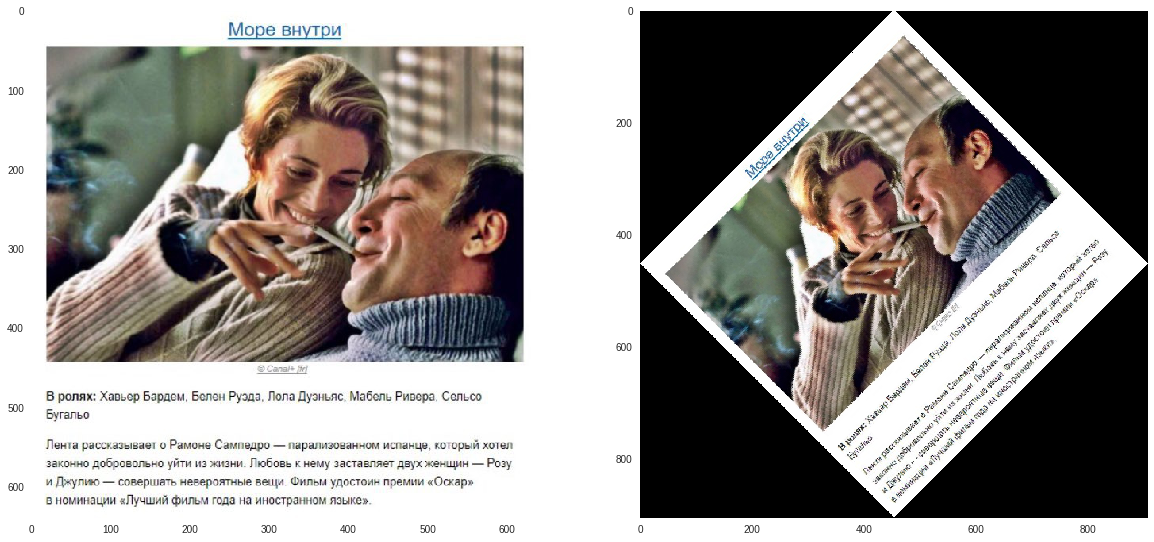

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.grid(False)
plt.imshow(img)
plt.subplot(122)
plt.imshow(newcopy)
plt.grid(False)
plt.show()

In [0]:
# plt.figure(figsize=(20,20))
# plt.imshow(newcopy)
plt.imsave('rotated.png',newcopy)
# plt.show()
